In [56]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from model import PrototypeNetwork

In [66]:
model = PrototypeNetwork(PrototypeNetwork.get_default_config())
model.load_state_dict(torch.load('./checkpoints/model_final.pt'))

<All keys matched successfully>

In [67]:
test_dataset = torchvision.datasets.MNIST(root='./data', transform=torchvision.transforms.ToTensor(), download=False,
                                          train=False)

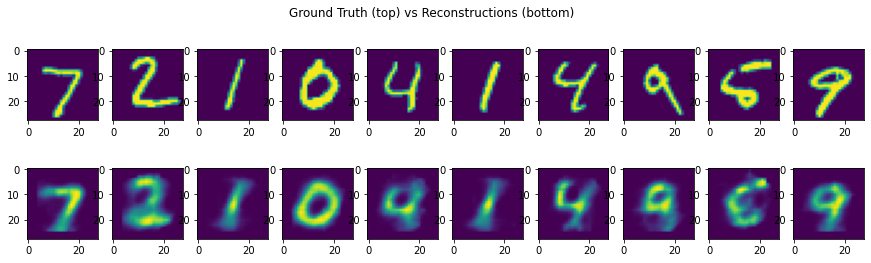

In [71]:
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
for i in range(10):
    x = test_dataset[i][0]
    images = x.unsqueeze(0)
    logits, latent_state, reconstruction, prototype_out = model(images)
    y = np.asarray(torchvision.transforms.ToPILImage()(reconstruction.squeeze(0).squeeze(0)))
    x = np.asarray(torchvision.transforms.ToPILImage()(x))
    axes[0][i].imshow(x)
    axes[1][i].imshow(y)
fig.suptitle("Ground Truth (top) vs Reconstructions (bottom)")

plt.show()

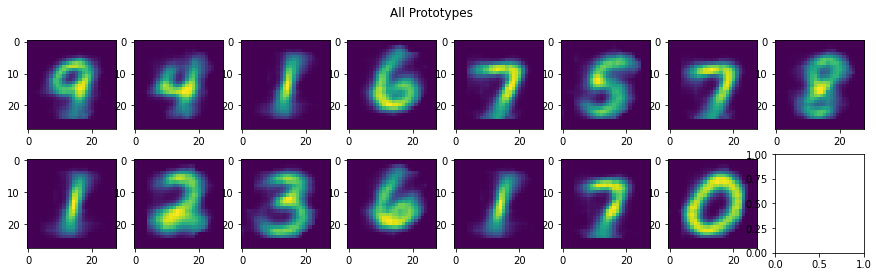

In [69]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
for i in range(15):
    prototype = model.prototype_layer.prototype_weights[i]
    reconstruction = model.autoencoder.reconstruct(prototype.view(1, -1, 2, 2))
    y = np.asarray(torchvision.transforms.ToPILImage()(reconstruction.squeeze(0).squeeze(0)))
    axes[i // 8][i % 8].imshow(y)

fig.suptitle("All Prototypes")

plt.show()

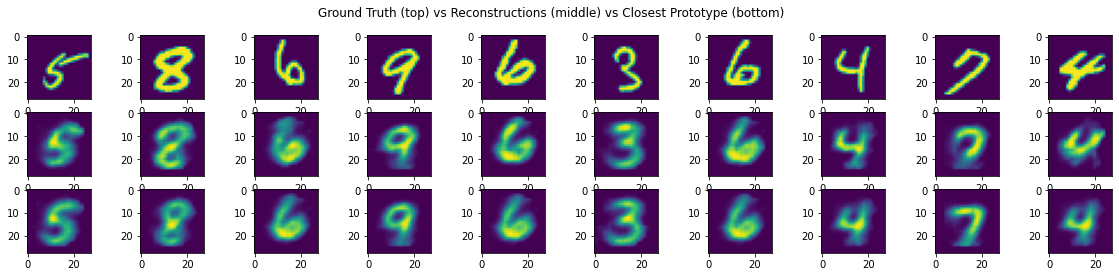

In [76]:
fig, axes = plt.subplots(3, 10, figsize=(20, 4))
counter = 0
for i in np.random.randint(0, len(test_dataset), size=10):
    x = test_dataset[i][0]
    images = x.unsqueeze(0)
    logits, latent_state, reconstruction, prototype_out = model(images)
    
    min_prototype = torch.min(prototype_out, 1)[1]
    y = np.asarray(torchvision.transforms.ToPILImage()(reconstruction.squeeze(0).squeeze(0)))
    x = np.asarray(torchvision.transforms.ToPILImage()(x))
    
    prototype = model.prototype_layer.prototype_weights[int(min_prototype)]
    reconstruction = model.autoencoder.reconstruct(prototype.view(1, -1, 2, 2))
    z = np.asarray(torchvision.transforms.ToPILImage()(reconstruction.squeeze(0).squeeze(0)))
    
    axes[0][counter].imshow(x)
    axes[1][counter].imshow(y)
    axes[2][counter].imshow(z)
    
    counter += 1
fig.suptitle("Ground Truth (top) vs Reconstructions (middle) vs Closest Prototype (bottom)")

plt.show()